## Chapter 5: Bond and Stock Valuation

Bond or fixed income securities and stock are two widely used investment vehicles.
Thus, they deserve a thorough discussion. Before touching upon bond or stock
valuation, we have to discuss interest rate and its related concepts, such as Annual
Percentage Rate (APR), Effective Annual Rate (EAR), compounding frequency,
how to convert one effective rate to another one, the term structure of interest rate,
how to estimate the selling price of a regular bond, how to use the so-called discount
dividend model to estimate the price of a stock, and so on. In particular, this chapter
will cover the following topics:

• Introduction to interest rates

• Conversion between various effective rates, APR

• The term structure of interest rates

• Bond evaluation and YTM

• Credit rating versus default spread

• Definition of duration and modified duration

• Stock evaluation, total returns, capital gain yield, and dividend yield

• A new data type – dictionary

Consider that someone wants to buy a $240,000 house with a 20% down payment and a 30 year mortgage at 4.25% annually. How much does he pay each month?

In [2]:
import numpy as np 
import numpy_financial as npf
npf.pmt(0.045/12,30*12,240000*0.8)

-972.8357948657007

He pays $972 a month for this mortgage.

In [6]:
# Code for calculating effective annual percentage rates between different compounding periods

def APR2Rm(APR1,m1,m2):
    return (1+APR1/m1)**(m1/m2)-1

# This one calculates outright annual percent rates
def EAR_f(APR,m):
    return (1+APR/m)**m-1

print("This is an example. APR of 10% semi annual compounding. What is the quarterly rate? Answer: ", APR2Rm(0.10,2,4))

This is an example. APR of 10% semi annual compounding. What is the quarterly rate? Answer:  0.02469507659595993


In [7]:
d=365
h=d*24
m=h*60
s=m*60
ms=s*1000
x=np.array([1,2,4,12,d,h,m,s,ms])
APR=0.1
for i in x:
    print(EAR_f(APR,i))

0.10000000000000009
0.10250000000000004
0.10381289062499954
0.10471306744129683
0.10515578161623251
0.10517028727456146
0.10517090753998182
0.10517091994187133
0.10517230537146749


What of Continuously compounded rates? How are they calculated? We need to use the natural logarithm function.

In [17]:
import math
from math import log
# Calculates continuously compounded rate
def APR2Rc(APR,m):
    return m*log(1+APR/m)

# Calculates APR from Rc
def Rc2APR(Rc,m):
    return m*(math.exp(Rc/m)-1)

# Calculate period rate from Rc
def Rc2Rm(Rc,m):
    return math.exp(Rc/m)-1

# Example shown with a 10% annual rate
print("10% annually compounded continuously: ", APR2Rc(0.0234, 2))
Rc2APR(0.02,2)

10% annually compounded continuously:  0.023264168459415393


0.020100334168335898

### Term Structure of Interest Rates

The term structure of interest rates is defined as the relationship between risk free rate and time. The risk free rate is usually defined as the default free treasury rate, which can be seen online. From 2016 we can see the following info, which is graphed:

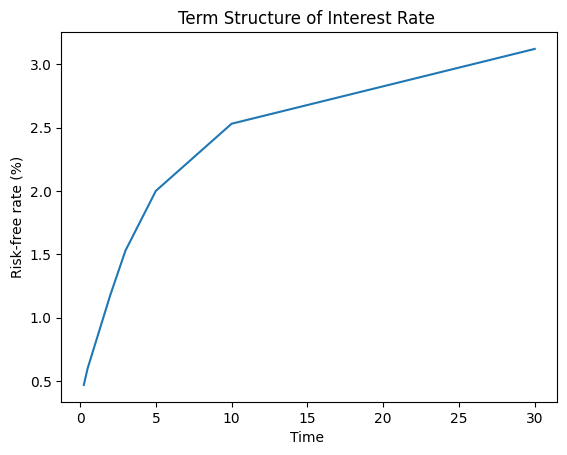

In [20]:
from matplotlib.pyplot import *
time=[3/12,6/12,2,3,5,10,30]
rate=[0.47,0.6,1.18,1.53,2,2.53,3.12]
title("Term Structure of Interest Rate ")
xlabel("Time ")
ylabel("Risk-free rate (%)")
plot(time,rate)
show()

In [23]:
import pandas as pd
import numpy as np
x=pd.Series([1,2,np.nan,np.nan,6])
x.interpolate()

0    1.000000
1    2.000000
2    3.333333
3    4.666667
4    6.000000
dtype: float64

In [24]:
def duration(t,cash_flow,y):
    n=len(t)
    B=0 # B is the bond's present value
    for i in range(n):
        B+=cash_flow[i]*math.exp(-y*t[i])
        D=0 # D is the duration
    for i in range(n):
        D+=t[i]*cash_flow[i]*math.exp(-y*t[i])/B
    return D

### Bond Evaluation
Bond is also called fixed income security. There are different types of categories. Based on maturity, bonds could be classified into short-term, median-term, and longterm. For US Treasury securities, T-bills are the securities issued by the Department of Treasury with a maturity less than 1 year, T-notes are for government bonds beyond 1 year but less than 10 years. T-bonds are treasury securities with a maturity beyond 10 years. Based on coupon payments, there are zero-coupon bonds and coupon bonds. When it is a central government's bond, we call them risk-free bonds since the central government usually has a right to print money, that is by default, free

In [31]:
npf.pv(0.024,3,0.08*100, 100)

-116.0247325897217

### Stock Valuation

The following notes relate to the n-period model used to calculate stock sales prices for a new company.

In [32]:
dividends=[1.80,2.07,2.277,2.48193,2.680,2.7877]
R=0.182
g=0.03
npf.npv(R,dividends[:-1])*(1+R)

9.523317320450868

In [33]:
npf.pv(R,5,0,2.7877/(R-g))

-7.949046992374841

### Dictionaries


In [34]:
# A dictionary called "houseHold"
houseHold={"father":"John","mother":"Mary","daughter":"Jane"}

# Access the value of "father" in this dictionary
houseHold['father']

'John'

## Graphing Appendices

### Appendix A – simple interest rate versus compounding interest rate
Here, PV is the present value, R is the period rate, and n is the number of periods.
Thus, those two future values will be $1,800 and $2,158.93.

The following program offers a graphic representation of a principal, simple interest
payment, and the future values:

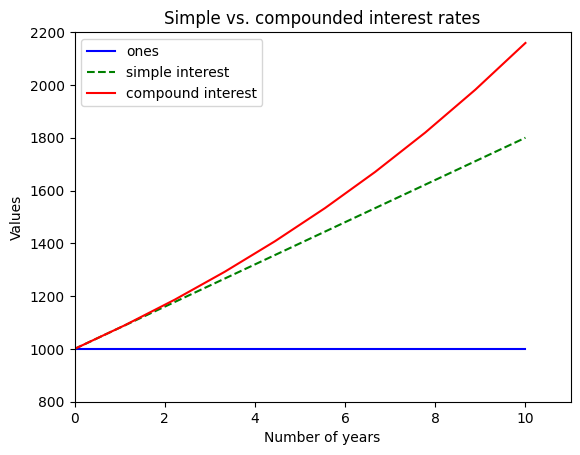

In [42]:
import numpy as np
from matplotlib.pyplot import *
from pylab import *

pv=1000
r=0.08
n=10
t=linspace(0,n,n)
y1=np.ones(len(t))*pv # a horizontal line
y2=pv*(1+r*t)
y3=pv*(1+r)**t
title('Simple vs. compounded interest rates')
xlabel('Number of years')
ylabel('Values')
xlim(0,11)
ylim(800,2200)
plot(t, y1, 'b-', label = 'ones')
plot(t, y2, 'g--', label = 'simple interest')
plot(t, y3, 'r-', label = 'compound interest')
legend(loc = 'best')
show()

### Appendix B – several Python functions related to interest conversion

In [43]:
def APR2Rm(APR1,m1,m2):
    """
    Objective: convert one APR to another Rm
    APR1: annual percentage rate
    m1: compounding frequency
    m2: effective period rate with this compounding
    Formula used: Rm=(1+APR1/m1)**(m1/m2)-1
    Example #1>>>APR2Rm(0.1,2,4)
    0.02469507659595993
    """
    return (1+APR/m1)**(m1/m2)-1
def APR2APR(APR1,m1,m2):
    """
    Objective: convert one APR to another Rm
    APR1: annual percentage rate
    m1: compounding frequency
    m2: effective period rate with this compounding
    Formula used: Rm=(1+APR1/m1)**(m1/m2)-1
    Example #1>>>APR2APR(0.1,2,4)
    0.09878030638383972
    """
    return m2*((1+APR/m1)**(m1/m2)-1)
def APR2Rc(APR,m):
    return m*log(1+APR/m)
def Rc2Rm(Rc,m):
    return exp(Rc/m)-1
def Rc2APR(Rc,m):
    return m*(exp(Rc/m)-1)

### Appendix C – Python program for rateYan.py

In [45]:
def rateYan(APR,type):
    """Objective: from one APR to another effective rate and APR2
    APR : value of the given Annual Percentage Rate
    type : Converting method, e.g., 's2a', 's2q', 's2c'
    's2a' means from semi-annual to annual
    a for annual
    s for semi-annual
    q for quarterly
    m for monthly
    d for daily
    c for continuously
    Example #1>>>rateYan(0.1,'s2a')
    [0.10250000000000004, 0.10250000000000004]
    Example #2>>>rateYan(0.1,'q2c')
    0.098770450361485657
    """
    import scipy as sp
    rate=[]
    if(type[0]=='a'):
        n1=1
    elif(type[0]=='s'):
        n1=2
    elif(type[0]=='q'):
        n1=4
    elif(type[0]=='m'):
        n1=12
    elif(type[0]=='d'):
        n1=365
    else:
        n1=-9
        
    if(type[2]=='a'):
        n2=1
    elif(type[2]=='s'):
        n2=2
    elif(type[2]=='q'):
        n2=4
    elif(type[2]=='m'):
        n2=12
    elif(type[2]=='d'):
        n2=365
    else:
        n2=-9 
        
    if(n1==-9 and n2==-9):
        return APR
    elif(n1==-9 and not(n2==-9)):
        effectiveRate=sp.exp(APR/n2)-1
        APR2=n2*effectiveRate
        rate.append(effectiveRate)
        rate.append(APR2)
        return rate
    elif(n2==-9 and not(n1==-9)):
        Rc=n1*sp.log(1+APR/n1)
        return Rc
    else:
        effectiveRate=(1+APR/n1)**(n1/n2)-1
        APR2=n2*effectiveRate
        rate.append(effectiveRate)
        rate.append(APR2)
        return rate 

### Appendix D – Python program to estimate stock price based on an n-period model

In [46]:
def pvValueNperiodModel(r,longTermGrowthRate,dividendNplus1):
    """Objective: estimate stock price based on an n-period model
    r: discount rate
    LongTermGrowhRate: long term dividend growth rate
    dividendsNpus1 : a dividend vector n + 1
    PV = d1/(1+R) + d2/(1+R)**2 + .... + dn/(1+R)**n + sellingPrice/(1+R)**n
    
    sellingPrice= d(n+1)/(r-g)
    where g is long term growth rate
    Example #1: >>> r=0.182
    >>> g=0.03
    >>> d=[1.8,2.07,2.277,2.48193,2.68,2.7877]
    >>>pvValueNperiodModel(r,g,d)
    17.472364312825711
    """
    import scipy as sp
    d=dividendNplus1
    n=len(d)-1
    g=longTermGrowthRate
    pv=sp.npv(r,d[:-1])*(1+r)
    sellingPrice=d[n]/(r-g)
    pv+=sp.pv(r,n,0,-sellingPrice)
    return pv

### Appendix F: Case Study

In [55]:
# We can read pickles as information
import pandas as pd
spread=pd.read_pickle('/opt/code/test_repo/Python-For-Finance-2nd-Edition/Files/spreadBasedOnCreditRating.pkl')
spread

,1,2,3,5,7,10,30
Rating,,,,,,,
Aaa/AAA,5.00,8.00,12.00,18.00,28.00,42.00,65.00
Aa1/AA+,10.00,18.00,25.00,34.00,42.00,54.00,77.00
Aa2/AA,14.00,29.00,38.00,50.00,57.00,65.00,89.00
Aa3/AA-,19.00,34.00,43.00,54.00,61.00,69.00,92.00
A1/A+,23.00,39.00,47.00,58.00,65.00,72.00,95.00
A2/A,24.00,39.00,49.00,61.00,69.00,77.00,103.00
A3/A-,32.00,49.00,59.00,72.00,80.00,89.00,117.00
Baa1/BBB+,38.00,61.00,75.00,92.00,103.00,115.00,151.00
Baa2/BBB,47.00,75.00,89.00,107.00,119.00,132.00,170.00
